In [ ]:
#Image Classification Using Convolutional Neural Network (CNN)

In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [59]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()#load data sets

In [62]:
X_train.shape

(50000, 32, 32, 3)

In [63]:
X_test.shape

(10000, 32, 32, 3)

In [64]:
y_train.shape

(50000, 1)

In [65]:
y_test.shape

(10000, 1)

In [66]:
X_train[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

b_train is in 2d array convet it to 1d

In [67]:
y_train=y_train.reshape(-1,)

In [68]:
y_test=y_test.reshape(-1,)

In [69]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [70]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [71]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [91]:
def plot_samp(a, b, index):
    plt.figure(figsize=(15,2))
    plt.imshow(a[index])
    plt.xlabel(classes[b[index]])




    plt.show()



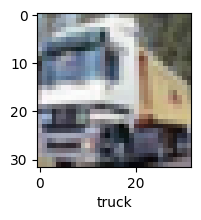

In [92]:
plot_samp(X_train,y_train, 1)

In [74]:
classes[0]

'airplane'

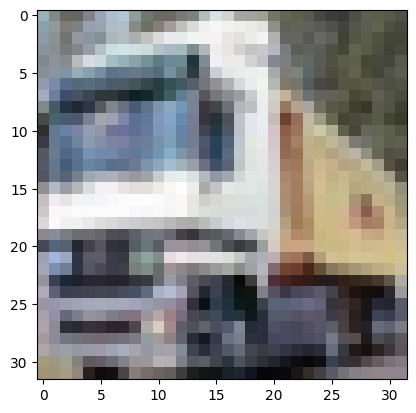

In [75]:
plt.imshow(X_train[1])

In [76]:
y_train[1]

np.uint8(9)

In [ ]:
#model building

In [77]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [79]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.2387 - loss: 3.0919
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.4751 - loss: 1.4478
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.5537 - loss: 1.2632
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.5968 - loss: 1.1477
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6286 - loss: 1.0624
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6536 - loss: 0.9868
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6842 - loss: 0.9109
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.6983 - loss: 0.8601
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7152 - loss: 0.8153
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7259 - loss: 0.7746


In [80]:
y_pred=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [88]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6353 - loss: 1.1342


[1.1417961120605469, 0.6324999928474426]

In [84]:
y_pred[:5]

array([[7.42506841e-03, 6.50078291e-04, 2.75987363e-03, 2.69067734e-01,
        1.62674391e-04, 5.83649613e-02, 1.47322966e-02, 1.26156595e-03,
        6.44034028e-01, 1.54175365e-03],
       [9.46098845e-03, 8.31198134e-03, 4.37752487e-06, 1.67786875e-05,
        1.33186944e-07, 5.76066483e-08, 6.25274083e-07, 1.09302105e-08,
        9.82086778e-01, 1.18159092e-04],
       [4.21919703e-01, 1.86996803e-01, 6.42370386e-03, 1.55744115e-02,
        4.45942953e-03, 2.66753393e-03, 1.66192895e-03, 3.68629419e-03,
        2.90747523e-01, 6.58626184e-02],
       [6.90038383e-01, 2.69330782e-03, 1.74377533e-03, 7.40406523e-03,
        2.09338572e-02, 4.81634820e-03, 1.03853305e-03, 1.34220102e-03,
        2.59617060e-01, 1.03724087e-02],
       [8.89517196e-06, 6.67726408e-06, 1.42337289e-02, 1.32322162e-02,
        9.45240140e-01, 9.10335872e-03, 1.70435794e-02, 1.11503387e-03,
        1.19031228e-07, 1.60721975e-05]], dtype=float32)

In [89]:
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])

[np.int64(8), np.int64(8), np.int64(0), np.int64(0), np.int64(4)]


In [90]:
classes[y_classes[3]]


'airplane'

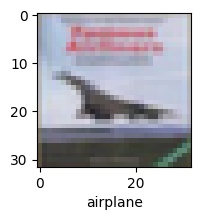

In [94]:

plot_samp(X_test, y_test,3)


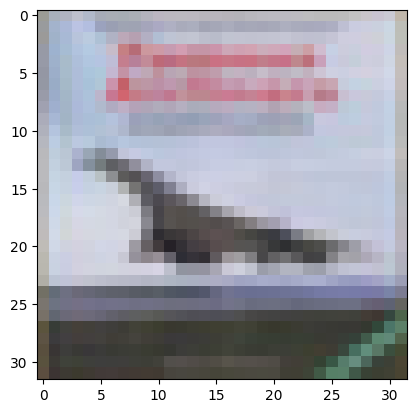

In [122]:
plt.imshow(X_test[3])

In [ ]:
#data_augmentation

In [114]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# image dimensions based on the dataset
img_height = 32
img_width = 32
img_channels = 3


In [117]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                   img_width,
                                   img_channels)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

  ]
)


In [118]:
cnn2 = models.Sequential([
    data_augmentation, # Input shape is now (32, 32, 3)
    layers.Conv2D(32, (3,3), activation='relu', padding='same'), # Added padding='same' to maintain dimensions initially
    layers.MaxPooling2D((2,2)), # Output: 16x16x32
    layers.Conv2D(64, (3,3), activation='relu', padding='same'), # Increased filters, padding='same'
    layers.MaxPooling2D((2,2)), # Output: 8x8x64
    layers.Conv2D(128, (3,3), activation='relu', padding='same'), # Added another conv layer, padding='same'
    layers.MaxPooling2D((2,2)), # Output: 4x4x128
    layers.Flatten(), # Output: 4 * 4 * 128 = 2048
    layers.Dense(128, activation='relu'), # Adjusted Dense layer units
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # 10 classes for CIFAR-10
])


In [119]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [120]:
cnn2.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 0.2740 - loss: 1.9600
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4623 - loss: 1.4975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.5193 - loss: 1.3581
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.5479 - loss: 1.2736
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 87ms/step - accuracy: 0.5770 - loss: 1.2063
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 86ms/step - accuracy: 0.6018 - loss: 1.1486
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.6098 - loss: 1.1190
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 86ms/step - accuracy: 0.6263 - loss: 1.0811
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 88ms/step - accuracy: 0.6330 - loss: 1.0543
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 87ms/step - accuracy: 0.6400 - loss: 1.0442


In [121]:
cnn2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7007 - loss: 0.8663


[0.8653569221496582, 0.7003999948501587]

fit model